<a href="https://colab.research.google.com/github/nandu-21/Daily-assingment/blob/main/Assignment(7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
# Load CSV from GitHub
url = "https://raw.githubusercontent.com/VijayDwivedi-ml/Machine-Learning-in-10-Days-with-projects/main/Day_4_Supervised_Learning_Regression/lab/USA_Housing_toy.csv"

df = pd.read_csv(url)

# Drop 'Address' (not useful for regression)
df.drop('Address', axis=1, inplace=True)

# Features & target
X = df.drop('Price', axis=1)
y = df['Price']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_

In [6]:
y_pred_rf = best_rf.predict(X_test)

print("Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
MSE: 19492188916.588154
MAE: 110978.32924839124
R2 Score: 0.8309064606046426


In [7]:
# Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)



In [8]:
def print_metrics(name, y_true, y_pred):
    print(f"{name}:\nMSE: {mean_squared_error(y_true, y_pred):.2f}, MAE: {mean_absolute_error(y_true, y_pred):.2f}, R2: {r2_score(y_true, y_pred):.4f}\n")

print_metrics("Linear Regression", y_test, y_pred_lr)
print_metrics("Ridge Regression", y_test, y_pred_ridge)
print_metrics("Lasso Regression", y_test, y_pred_lasso)
print_metrics("Random Forest", y_test, y_pred_rf)

Linear Regression:
MSE: 14519364497.01, MAE: 97559.46, R2: 0.8740

Ridge Regression:
MSE: 14519480916.13, MAE: 97562.33, R2: 0.8740

Lasso Regression:
MSE: 14519362768.63, MAE: 97559.50, R2: 0.8740

Random Forest:
MSE: 19492188916.59, MAE: 110978.33, R2: 0.8309



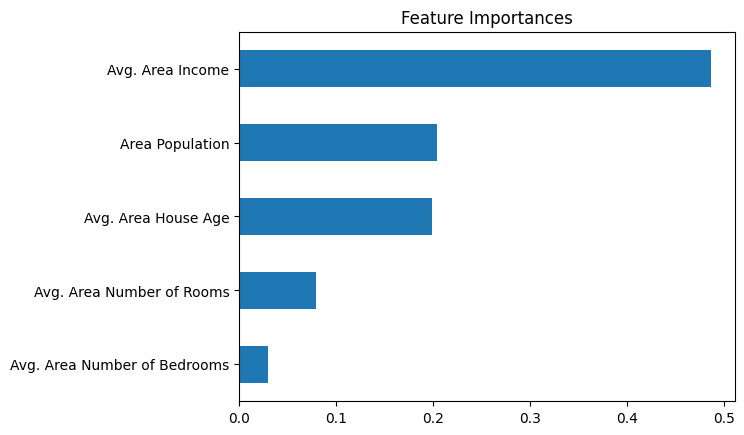

In [9]:

import matplotlib.pyplot as plt

importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title="Feature Importances")
plt.show()
